In [187]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# So cool settings
square_color = {'facecolor': 'none', 'edgecolor': 'black'}
circle_color = {'color': 'black'}

In [188]:
means = [[0, 5], [5, 0]]
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0, N1 = 50, 40
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0)
X1 = np.random.multivariate_normal(means[1], cov1, N1)

m0 = np.mean(X0.T, axis=1, keepdims=True)
m1 = np.mean(X1.T, axis=1, keepdims=True)

a = (m0 - m1)
S_B = a.dot(a.T)

A = X0.T - np.tile(m0, (1, N0))
B = X1.T - np.tile(m1, (1, N1))
S_W = A.dot(A.T) + B.dot(B.T)

_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

sorted_id = np.argsort(-1 * _)
w = W[:, sorted_id[0]]
print(w)

[ 0.660034   -0.75123573]


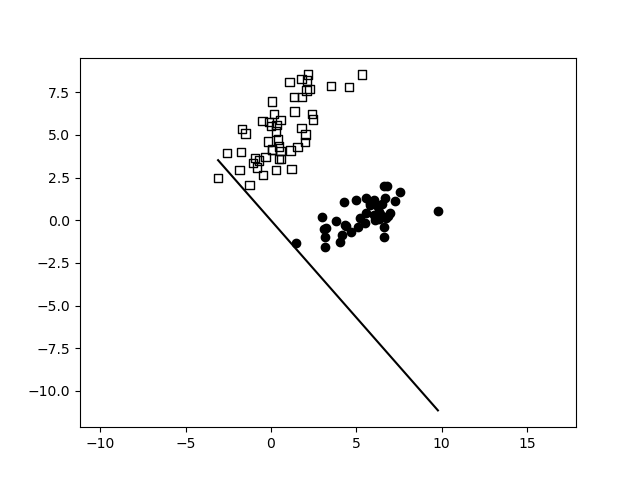

In [189]:
fig = plt.figure()
plt.scatter(X0[:, 0], X0[:, 1], marker='s', **square_color)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', **circle_color)

line_x = np.linspace(min(np.min(X0[:, 0]), np.min(X1[:, 0])), 
                     max(np.max(X0[:, 0]), np.max(X1[:, 0])),
                    100)
line_y = line_x * (w[1] / w[0])
plt.plot(line_x, line_y, c='black')
plt.axis('equal')
plt.show()

In [190]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.concatenate((X0, X1))
y = np.array([0]*N0 + [1]*N1)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print('w_sklearn = ', clf.coef_[0]/np.linalg.norm(clf.coef_)) # normalize

w_sklearn =  [ 0.660034   -0.75123573]


In [191]:
means = [[5, 0, 0], [0, 5, 0], [0, 0, 5]]
cov0 = [[3, 1, 1], [1, 1, 1], [1, 1, 1]]
cov1 = [[1, 1, 1], [1, 3, 1], [1, 1, 1]]
cov2 = [[1, 1, 1], [1, 1, 1], [1, 1, 3]]
N0, N1, N2 = 40, 50, 40
N = N0 + N1 + N2
X0 = np.random.multivariate_normal(means[0], cov0, N0)
X1 = np.random.multivariate_normal(means[1], cov1, N1)
X2 = np.random.multivariate_normal(means[2], cov2, N2)

In [192]:
m0 = np.mean(X0.T, axis=1, keepdims=True)
m1 = np.mean(X1.T, axis=1, keepdims=True)
m2 = np.mean(X2.T, axis=1, keepdims=True)
m = (N0 * m0 + N1 * m1 + N2 * m2) / N

a0 = m0 - m
a1 = m1 - m
a2 = m2 - m
S_B = N0 * (a0.dot(a0.T)) + N1 * (a1.dot(a1.T)) + N2 * (a2.dot(a2.T))

A0 = X0.T - np.tile(m0, (1, N0))
A1 = X1.T - np.tile(m1, (1, N1))
A2 = X2.T - np.tile(m2, (1, N2))

S_W = A0.dot(A0.T) + A1.dot(A1.T) + A2.dot(A2.T)
_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) 
sorted_id = np.argsort(_)
w = W[:, sorted_id[1:]]
print(W)
n_vector = np.cross(w[:, 0], w[:, 1])

[[-0.56384923 -0.84150779 -0.12344347]
 [-0.56641215  0.43130598 -0.66763899]
 [-0.60104186  0.32533029  0.73417974]]


In [193]:
print(n_vector)

[-0.5338593  -0.57765807 -0.61506531]


In [194]:
points = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(points, points)
Z = (-n_vector[0] / n_vector[2]) * X + (-n_vector[1] / n_vector[2]) * Y

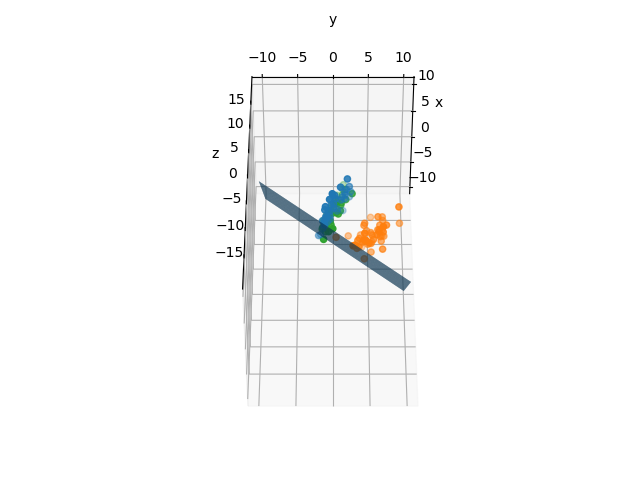

In [195]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, zorder = -10)
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2])
ax.view_init(-45, 0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_aspect('equal')
plt.show()
# plt.close()

In [196]:
X_test = np.concatenate((X0, X1, X2))
y_test = np.array([0]*N0 + [1]*N1 + [2]*N2)
clf = LinearDiscriminantAnalysis(solver='eigen')
clf.fit(X_test, y_test)
print(clf.coef_)
test_vector = np.cross(clf.coef_[:, 0], clf.coef_[:, 1])
print(test_vector)

[[ 6.96962612 -2.17426302 -2.68102665]
 [-1.91424192  5.1182925  -1.81911492]
 [-2.41033077 -1.82757658  5.13490915]]
[15.83520162 17.97821852 31.51051969]
